<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2025/blob/main/Seminars/BioInf/S1_Numpy_Pandas_Mpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы ML
## Семинар 1. Основы работы в Python.
### NumPy и почему это быстро. Базовый анализ данных. Pandas и работа с таблицами. Matplotlib визуализация

## Библиотека NumPy

In [ ]:
import numpy as np

In [ ]:
np.__version__

'1.26.4'

Давайте подумаем, **зачем** нужен **целый модуль** для математики, массивов и матриц?

_Мне будет достаточно списков!_ - they said.

### Что есть в `numpy`?

![numpy-operations.png](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/numpy-operations.png)

### Зачем же нужен `numpy`?

*Сколько программистов нужно, чтобы заменить лампочку?*

*Ни одного - проблема тут по части железа.*

Numpy нужен для **векторизованных вычислений**!

### Что такое векторизованные вычисления?

**Если бы у вас был список чисел, и ко всем надо было прибавить 1, то как бы вы поступили?**

In [ ]:
a = [1, 6, 3, 4, 3, 7]

In [ ]:
a = [i + 1 for i in a]
a

[2, 7, 4, 5, 4, 8]

In [ ]:
a = np.array([1, 6, 3, 4, 3, 7])
a

array([1, 6, 3, 4, 3, 7])

In [ ]:
a + 1

array([2, 7, 4, 5, 4, 8])

### Мораль 0
Векторизация помогает избавиться от циклов и лишнего кода!

**А чем еще помогает векторизация вычислений?**

In [ ]:
mln = 10 ** 6

In [ ]:
a = list(range(mln))

In [ ]:
%%timeit

[e * e for e in a]

65.3 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
a = np.arange(mln)

In [ ]:
%%timeit

a * a

760 µs ± 53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Какой элемент синтаксиса занимает наибольшее количество времени?

Конечно же, **цикл**!

Ещё дольше выполняются вложенные циклы:

In [ ]:
rows, cols = 1000, 1000

a = [list(range(i, i + cols)) for i in range(0, rows)]
b = [[0 for j in range(cols)] for i in range(rows)]

In [ ]:
%%timeit

for i in range(rows):
    for j in range(cols):
        b[i][j] = 2 * a[i][j]

152 ms ± 15.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Сравним с **векторизованными** циклами:

In [ ]:
a = np.asarray([list(range(i, i + cols)) for i in range(0, rows)])

In [ ]:
%%timeit

2 * a

673 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



Векторизация помогает ускорить время выполнения векторизуемых операций в десятки раз!

## Массив `numpy.array`

### В чем его отличие от списка?

![list-array.png](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/list-array.png)

Почему в массиве важно иметь **один и тот же тип данных**?

### Создание массива

Самый простой способ создать массив `numpy.array` - из стандартного списка `list`.

![vis-numpy-2.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-2.jpg)

In [ ]:
mydata = np.array([1, 2, 3])
mydata

array([1, 2, 3])

Массив может быть и многомерным!

![vis-numpy-10.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-10.jpg)

In [ ]:
mydata_2d = np.array([[1, 2],
                      [3, 4]])
mydata_2d

array([[1, 2],
       [3, 4]])

### Важнейшая информация о массиве

In [ ]:
mydata.dtype

dtype('int64')

In [ ]:
mydata.itemsize

8

#### Типы данных в `numpy`

| Тип данных | Описание |
|:---------- |:-------- |
| bool       | Boolean (True or False) stored as a byte |
| int        | Platform integer (normally either int32 or int64) |
| int8       | Byte (-128 to 127) |
| int16      | Integer (-32768 to 32767) |
| int32      | Integer (-2147483648 to 2147483647) |
| int64      | Integer (-9223372036854775808 to 9223372036854775807) |
| uint8      | Unsigned integer (0 to 255) |
| uint16     | Unsigned integer (0 to 65535) |
| uint32     | Unsigned integer (0 to 4294967295) |
| uint64     | Unsigned integer (0 to 18446744073709551615) |
| float      | Shorthand for float64 |
| float32    | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa |
| float64    | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa |
| complex    | Shorthand for complex128 |
| complex64  | Complex number, represented by two 32-bit floats (real and imaginary components) |
| complex128 | Complex number, represented by two 64-bit floats (real and imaginary components) |

In [ ]:
mydata = np.array([[1, 2, 3, 4, 5],
                   [6, 7, 8, 9, 0],
                   [7, 0, 8, 8, 1]], dtype=np.int8)
mydata

array([[1, 2, 3, 4, 5],
       [6, 7, 8, 9, 0],
       [7, 0, 8, 8, 1]], dtype=int8)

In [ ]:
mydata.dtype

dtype('int8')

In [ ]:
mydata.itemsize

1

In [ ]:
len(mydata)

3

In [ ]:
mydata.ndim

2

In [ ]:
mydata.shape

(3, 5)

In [ ]:
mydata.size

15

### `numpy.array.shape`

![dimensions.png](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/dimensions.png)

### Другие способы инициализации `numpy.array`...

В плохом коде набор величин может инициализироваться вот так:

In [ ]:
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0

Допустим, мы хотим сделать массив `numpy.array` размером 10$\times$3 из нулей.

Сделаем способом, который помним!

In [ ]:
x = 10
y = 3
zeros = []
for i in range(y):
    sub_zero = []
    for j in range(x):
        sub_zero.append(0)
    zeros.append(sub_zero)
zeros = np.array(zeros)
zeros

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

![meme_jack-sparrow.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/meme_jack-sparrow.jpg)

### Как сделать это нормально?

В стандартном Python:

In [ ]:
x = 10
y = 3
zeros = [[0 for _ in range(x)] for _ in range(y)]
zeros

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
zeros[0][5] = 2
zeros

[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
zeros = [[0] * x] * y  # bad way!
zeros

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
zeros[0][5] = 2  # why it's bad
zeros

[[0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 2, 0, 0, 0, 0]]

В NumPy:

In [ ]:
np.zeros(shape=(3, 10), dtype=int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Чтобы создавать простые массивы `numpy.array`, можно воспользоваться специальными функциями:

![vis-numpy-3.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-3.jpg)

Аналогично с многомерными массивами:

![vis-numpy-11.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-11.jpg)

Если необходимо заполнить массив другим одним числом, можно воспользоваться `np.full`

In [ ]:
np.full(7, 3)

Аналоги `range`, сразу возвращающие массив `numpy.array`:

In [ ]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1, 10, 2)

array([1, 3, 5, 7, 9])

In [ ]:
np.arange(1, 10, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [ ]:
np.linspace(0, 1, 5, endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Подсказки по любому объекту можно получить через `help`. В Jupyter Notebook и Colab для этого удобно использовать `?`

In [ ]:
help(np.linspace)

NameError: name 'np' is not defined

**В чем разница?**

Давайте создадим пару массивов

In [ ]:
# создайте массив из произвольного списка

In [ ]:
# создайте массив длиной 7, заполненный случайными числами

In [ ]:
# создайте массив длиной 4, заполненный числом 42

In [ ]:
# создайте массив с числами от 0.1 до 0.5 с шагом 0.1

## Алгебраические операции

_— Какие храбрые поступки вы совершали в своей жизни?_

_— Однажды на алгебре я руку поднял._

![meme_sci-calc.png](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/meme_sci-calc.png)

![meme_sci-calc-2.png](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/meme_sci-calc-2.png)

### Базовая арифметика

In [ ]:
data = np.array([[1, 2],
                 [3, 4],
                 [5, 6]], dtype=np.int8)

**Проверим несколько примеров:**

In [ ]:
data + 2

array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int8)

In [ ]:
data - 3

array([[-2, -1],
       [ 0,  1],
       [ 2,  3]], dtype=int8)

In [ ]:
data * 4

array([[ 4,  8],
       [12, 16],
       [20, 24]], dtype=int8)

In [ ]:
data // 5

array([[0, 0],
       [0, 0],
       [1, 1]], dtype=int8)

In [ ]:
data / 5

array([[0.2, 0.4],
       [0.6, 0.8],
       [1. , 1.2]])

In [ ]:
(data / 5).dtype

In [ ]:
data ** 2

array([[ 1,  4],
       [ 9, 16],
       [25, 36]], dtype=int8)

In [ ]:
2 ** data

array([[ 2,  4],
       [ 8, 16],
       [32, 64]], dtype=int8)

### Поэлементные операции на массивах

Как вы думаете, **что произойдет**, если попытаться **сложить 2 массива**?

![vis-numpy-5.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-5.jpg)

С другими операциями это тоже работает:

![vis-numpy-6.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-6.jpg)

А что получится **с многомерными массивами**?

Всё так же!

![vis-numpy-12.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-12.jpg)

### Элементарные функции

А теперь перейдем от базовой арифметики к чуть более cложным функциям.

_Подождите, это все была **базовая** арифметика?_

In [ ]:
data = np.array([[1, 2, 3],
                 [4, 5, 8]])

In [ ]:
np.sqrt(data)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.82842712]])

In [ ]:
np.exp(data)

array([[2.71828183e+00, 7.38905610e+00, 2.00855369e+01],
       [5.45981500e+01, 1.48413159e+02, 2.98095799e+03]])

In [ ]:
np.log(data)

array([[0.        , 0.69314718, 1.09861229],
       [1.38629436, 1.60943791, 2.07944154]])

In [ ]:
np.log2(data)

array([[0.        , 1.        , 1.5849625 ],
       [2.        , 2.32192809, 3.        ]])

### Агрегирующие операции

In [ ]:
np.random.seed(777)
a = np.random.randint(0, 6, size=(8,))
a[3] = 10
a

array([ 3,  1,  5, 10,  1,  2,  0,  2])

In [ ]:
a.min(), a.max(), a.argmax(), a.sum(), a.prod(), a.mean()

(0, 10, 3, 24, 0, 3.0)

In [ ]:
np.min(a), np.max(a), np.argmax(a), np.sum(a), np.prod(a), np.mean(a)

(0, 10, 3, 24, 0, 3.0)

![vis-numpy-17.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-17.jpg)

Старайтесь **не использовать** с массивами `numpy.array` питоновские функции `min`, `max` и `sum`.

Какая у этого причина?

In [ ]:
a = np.random.randint(-2, 8, size=(6,))
max(a), a

(5, array([-2, -1,  0,  2,  3,  5]))

In [ ]:
a = np.random.randint(-2, 8, size=(4, 3))
max(a), a

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Почему *агрегирующие* операции?

Просто потому что они выполняют агрегацию (редукцию) по определенной оси!

Разберем, что делает `numpy.array.???(axis=axis)` – агрегирующая операция вдоль оси `axis`:

* выполняет редукцию (агрегирующую операцию) по оси `axis`;
* удаляет ось `axis` из исходного массива.

**Что все это значит? Как это применять?**

Разберем пример:

![vis-numpy-18.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-18.jpg)

In [ ]:
data = np.array([[1, 2],
                 [5, 3],
                 [4, 6]], dtype=int)

In [ ]:
data.max(axis=0)

array([5, 6])

In [ ]:
data.max(axis=1)

array([2, 5, 6])

## Операции с размерами и размерностями массивов

### Изменение размеров массива

In [ ]:
data = np.array([4, 8, 15, 16, 23, 42, 58, 141, 220, 509, 666, 1000])
data.shape

(12,)

Метод `.reshape` позволяет изменить размер массива на заданный. При этом не происходит добавление новых элементов.

In [ ]:
data.reshape(4, 3)

array([[   4,    8,   15],
       [  16,   23,   42],
       [  58,  141,  220],
       [ 509,  666, 1000]])

In [ ]:
data.reshape(3, 4)

array([[   4,    8,   15,   16],
       [  23,   42,   58,  141],
       [ 220,  509,  666, 1000]])

In [ ]:
data

array([   4,    8,   15,   16,   23,   42,   58,  141,  220,  509,  666,
       1000])

In [ ]:
data

array([[   4,    8,   15],
       [  16,   23,   42],
       [  58,  141,  220],
       [ 509,  666, 1000]])

In [ ]:
data.reshape(2, 6)

array([[   4,    8,   15,   16,   23,   42],
       [  58,  141,  220,  509,  666, 1000]])

При этом нельзя осуществлять изменение размера, если число элементов не сохраняется:

In [ ]:
data.reshape(5, 3)

ValueError: cannot reshape array of size 12 into shape (5,3)

In [ ]:
data.reshape(5, 2)

ValueError: cannot reshape array of size 12 into shape (5,2)

Если длина массива по одному из измерений определяется однозначно, можно указать вместо нее `-1`.

In [ ]:
data.reshape(2)

ValueError: cannot reshape array of size 12 into shape (2,)

In [ ]:
data.reshape(2, -1)

array([[   4,    8,   15,   16,   23,   42],
       [  58,  141,  220,  509,  666, 1000]])

In [ ]:
data.reshape(2, -10)  # так лучше не делать

array([[   4,    8,   15,   16,   23,   42],
       [  58,  141,  220,  509,  666, 1000]])

In [ ]:
data.reshape(-1, 2)

array([[   4,    8],
       [  15,   16],
       [  23,   42],
       [  58,  141],
       [ 220,  509],
       [ 666, 1000]])

In [ ]:
data.reshape(2, -1, 1)

array([[[   4],
        [   8],
        [  15],
        [  16],
        [  23],
        [  42]],

       [[  58],
        [ 141],
        [ 220],
        [ 509],
        [ 666],
        [1000]]])

Иногда целой длины не существует:

In [ ]:
data.reshape(5, -1)

ValueError: cannot reshape array of size 12 into shape (5,newaxis)

...или решение может быть неоднозначным:

In [ ]:
data.reshape(4, -1, -1)

ValueError: can only specify one unknown dimension

Метод `.transpose` осуществляет классическое траспонирование. Для него существует alias (сокращение) — `.T`

In [ ]:
data_t = data.reshape(3, 4).T

In [ ]:
data_t.shape

(4, 3)

### Перевод массива в одномерный вид

Мы получили многомерный массив. Как можно вернуться назад, к одномерному виду?

In [ ]:
data = np.arange(1, 19).reshape(3, 2, -1)
data

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

Существует метод `.ravel`, превращающий массив в одномерный вид

In [ ]:
data.ravel()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

Но чаще будем пользоваться методом `.flatten`, потому что он всегда создает копию исходного массива

In [ ]:
data.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

Можно примеенить флаг `order` со значениями `"C"` или `"F"` для прохода по строкам или колонкам соответственно

In [ ]:
data.ravel(order="F")

array([ 1,  7, 13,  4, 10, 16,  2,  8, 14,  5, 11, 17,  3,  9, 15,  6, 12,
       18])

### *Правило приведения размерности

Можно совершать операции над **разными по размерностям** массивами.

![vis-numpy-13.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-13.jpg)

Когда некоторые размерности не совпадают, numpy попытается дополнить меньший массив фиктивными размерностями. Этот процесс называется бродкастинг (broadcasting)

In [ ]:
data = np.array([[1, 2],
                 [3, 4],
                 [5, 6]], dtype=int)

In [ ]:
data.shape

(3, 2)

In [ ]:
data + np.ones(2)

array([[2., 3.],
       [4., 5.],
       [6., 7.]])

In [ ]:
data + np.ones(3)

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [ ]:
data + np.ones(shape=(3, 1))

array([[2., 3.],
       [4., 5.],
       [6., 7.]])

Почему для 2D-массивов 1D-массив прибавляется по `axis=1`, но не прибавляется по `axis=0`?

На самом деле существуют специальное **правило приведения размерностей**:

1. Предположим, что `a.shape = (a_1, a_2, ..., a_n)` и `b.shape = (b_1, b_2, ..., b_n)`. Над `a` и `b` можно произвести поэлементую бинарную операцию, если $\forall \; i \in (1...n)$ выполнено хотя бы одно из условий:
    * `a_i == b_i`;
    * `a_i == 1`;
    * `b_i == 1`.


2. Если размерности не совпадают, то к массиву меньшей размерности добавляются **_ведущие_ фиктивные размерности**.

Документация: https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

А как будет происходить умножение?

In [ ]:
data1 = np.array([[1, 2],
                  [3, 4]])

data2 = np.array([[0, 10],
                  [20, -1]])

In [ ]:
data1 * data2

array([[ 0, 20],
       [60, -4]])

Но что делать, если нам нужно *матричное умножение*?

In [ ]:
data = np.array([1, 2, 3])

In [ ]:
powers_of_ten = (10 ** np.arange(6)).reshape(3, 2)
powers_of_ten

array([[     1,     10],
       [   100,   1000],
       [ 10000, 100000]])

In [ ]:
data @ powers_of_ten

array([ 30201, 302010])

![vis-numpy-14.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-14.jpg)

Для тех, кто забыл, что такое матричное умножение:

![vis-numpy-15.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-15.jpg)

## Логические операции

In [ ]:
data = np.arange(6)
data

array([0, 1, 2, 3, 4, 5])

In [ ]:
data = data > 2
data

array([False, False, False,  True,  True,  True])

In [ ]:
data.any(), np.any(data), any(data)

(True, True, True)

In [ ]:
data.all(), np.all(data), all(data)

(False, False, False)

### Логические операции в многомерных массивах

In [ ]:
data = np.arange(12).reshape(3, 4) >= 3
data

array([[False, False, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [ ]:
data.all()

False

In [ ]:
data.all(axis=0), data.all(axis=1)

(array([False, False, False,  True]), array([False,  True,  True]))

In [ ]:
all(data)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Бинарные логические операции

In [ ]:
a = np.array([1, 1, 0, 0, 1], dtype=bool)
b = np.array([1, 0, 0, 1, 0], dtype=bool)

In [ ]:
a and b

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
[1] and "GG"

'GG'

In [ ]:
a & b # аналог И

array([ True, False, False, False, False])

In [ ]:
a | b # аналог ИЛИ

array([ True,  True, False,  True,  True])

In [ ]:
a ^ b # аналог XOR

array([False,  True, False,  True,  True])

## Другие операции с массивами `numpy.array`
### Генерация случайных чисел

In [ ]:
np.random.seed(777)

In [ ]:
np.random.rand(10)

array([0.15266373, 0.30235661, 0.06203641, 0.45986034, 0.83525338,
       0.92699705, 0.72698898, 0.76849622, 0.26920507, 0.64402929])

In [ ]:
np.random.randint(0, 10, 10)

array([1, 2, 4, 5, 7, 1, 7, 2, 2, 7])

In [ ]:
np.random.permutation(10)

array([6, 0, 8, 7, 3, 9, 5, 4, 2, 1])

In [ ]:
np.random.choice(10, size=10)

array([8, 3, 2, 0, 3, 3, 4, 0, 6, 5])

### Сортировка массивов

In [ ]:
np.random.seed(777)

data = np.random.randint(1, 20, 10)
data

array([ 8, 16,  7, 18,  8,  8, 15,  8, 19, 14])

In [ ]:
np.sort(data), data

(array([ 7,  8,  8,  8,  8, 14, 15, 16, 18, 19]),
 array([ 8, 16,  7, 18,  8,  8, 15,  8, 19, 14]))

In [ ]:
data.sort(), data

(None, array([ 7,  8,  8,  8,  8, 14, 15, 16, 18, 19]))

### Индексация и срезы

Интерфейс доступа к элементам массива несколько проще, чем элементу списка. В обычном python мы делаем следующее:

In [ ]:
lst[0][0]

Для массива же можно указывать индексы через запятую:

In [ ]:
data[0, 0]

np.int64(8)

In [ ]:
np.random.seed(777)

data = np.random.randint(1, 20, size=(7, 12))
data

array([[ 8, 16,  7, 18,  8,  8, 15,  8, 19, 14, 15,  1],
       [ 2, 19,  6,  8,  2,  8, 11, 19, 19,  8, 14,  5],
       [ 7,  3, 11,  8, 16,  1,  9,  3, 17,  4, 14,  5],
       [12,  1,  7, 15,  6,  2, 11,  5, 11,  5, 17, 10],
       [ 5, 17, 16,  1, 15, 18,  9, 10, 13, 17,  3,  4],
       [12,  6, 13, 14, 15,  5, 10,  4,  8,  8,  1,  4],
       [ 4,  8, 17,  5,  9,  8, 18,  9, 16,  5,  6,  4]])

In [ ]:
data[1]

array([ 2, 19,  6,  8,  2,  8, 11, 19, 19,  8, 14,  5])

In [ ]:
data[1:4]

array([[ 2, 19,  6,  8,  2,  8, 11, 19, 19,  8, 14,  5],
       [ 7,  3, 11,  8, 16,  1,  9,  3, 17,  4, 14,  5],
       [12,  1,  7, 15,  6,  2, 11,  5, 11,  5, 17, 10]])

In [ ]:
data[1:5,2:8]

array([[ 6,  8,  2,  8, 11, 19],
       [11,  8, 16,  1,  9,  3],
       [ 7, 15,  6,  2, 11,  5],
       [16,  1, 15, 18,  9, 10]])

![vis-numpy-16.jpg](https://data.bioml.ru/htdocs/courses/python/datasci/numpy/img/vis-numpy-16.jpg)

Также можно индексировать массив по списку индексов, это называется "fancy indexing".

In [ ]:
x = [1, 3, 5]
data[x]

array([[ 2, 19,  6,  8,  2,  8, 11, 19, 19,  8, 14,  5],
       [12,  1,  7, 15,  6,  2, 11,  5, 11,  5, 17, 10],
       [12,  6, 13, 14, 15,  5, 10,  4,  8,  8,  1,  4]])

По срезам можно присваивать!

In [ ]:
data = np.zeros((5, 5), dtype=int)
data

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
data[1, 3] = 1
data

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
data[3] = 2
data

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0]])

In [ ]:
data[:,2] = 3
data

array([[0, 0, 3, 0, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 3, 0, 0],
       [2, 2, 3, 2, 2],
       [0, 0, 3, 0, 0]])

In [ ]:
data[[1, 3],[2, 4]] = 4
data

array([[0, 0, 3, 0, 0],
       [0, 0, 4, 1, 0],
       [0, 0, 3, 0, 0],
       [2, 2, 3, 2, 4],
       [0, 0, 3, 0, 0]])

In [ ]:
data[[1, 3],:] = 5
data[:,[2, 4]] = 5
data

array([[0, 0, 5, 0, 5],
       [5, 5, 5, 5, 5],
       [0, 0, 5, 0, 5],
       [5, 5, 5, 5, 5],
       [0, 0, 5, 0, 5]])

Можно добавлять фиктивные одномерные оси для увеличения размерности массива без добавления данных при помощи `None`

In [ ]:
data = np.array([[1, 2, 3], [4, 5, 6]])
data

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
data[:, None, :]

array([[[1, 2, 3]],

       [[4, 5, 6]]])

In [ ]:
data[:, :, None]

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

## Библиотека Pandas

**Pandas** - это высокоуровневая библиотека для анализа данных.

![pandas.jpeg](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/pandas.jpeg)

Построена она поверх более низкоуровневой NumPy (а с версии 2.0 - PyArrow), и это значительно увеличивает ее производительность. В экосистеме Python, **pandas** является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных.

In [ ]:
import numpy as np
import pandas as pd

![pandas.webp](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/tucker_carlson_exposes_pandas.webp)

### Что дает нам Pandas?

Основная сила библиотеки - в очень широком наборе методов для главного класса объектов: `DataFrame`.

### `pandas.DataFrame`

Объект `DataFrame` лучше всего представлять себе в виде обычной таблицы. Идея `DataFrame` - табличная организация структуры данных.

В любой таблице всегда присутствуют строки и столбцы. Объекты `Series` являются столбцами в `DataFrame`, а строки в последних составлены непосредственно из элементов `Series`.

**Почему `Series` - это столбцы, а не строки?**

![dataframe_series.png](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/dataframe_series.png)

#### Создаем `pandas.DataFrame`

В Pandas предусмотрено огромное множество способов задать датафрейм.

Создать `pd.DataFrame` можно, к примеру, из **словаря списков**:

In [ ]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'area': [2724902, 17125191, 207600, 603628]
})
df

,country,population,area
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


from matplotlib import pyplot as plt
df['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='population', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='population', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='area', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='population', y='area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['population']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('population')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['area']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('area')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='index', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='population', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='area', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### Импорт `pandas.DataFrame`

Но чаще всего, конечно, вы получаете `DataFrame` из файловых источников. Pandas поддерживает множество разных форматов данных.

![file_operations.png](https://data.bioml.ru/htdocs/courses/python/datasci/pandas/img/file_operations.png)

    pd.read_csv(filename)
    pd.read_excel(filename)
    pd.read_sql(query, connection_object)
    pd.read_table(filename)
    pd.read_json(json_string)
    pd.read_html(url)
    pd.read_clipboard()
    pd.DataFrame(dict)

Загрузим датасет "[Heart UCI](https://www.kaggle.com/ronitf/heart-disease-uci)" с данными по пациентам с болезнью сердца.

In [ ]:
%%shell
wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/Heart_UCI_modified.csv
wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/Heart_UCI_modified.xls
wget https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/Heart_UCI_modified.xlsx

--2025-11-28 10:21:41--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/Heart_UCI_modified.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28752 (28K) [text/csv]
Saving to: ‘Heart_UCI_modified.csv’

Heart_UCI_modified. 100%[===================>]  28.08K  --.-KB/s    in 0s      

2025-11-28 10:21:42 (269 MB/s) - ‘Heart_UCI_modified.csv’ saved [28752/28752]

--2025-11-28 10:21:42--  https://data.bioml.ru/htdocs/courses/python/datasci/pandas/data/Heart_UCI_modified.xls
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87552 (86K) [application/vnd.ms-excel]
Saving to: ‘Heart_UCI_modified.xls’

Heart_UCI_modified. 100%[===================>]  85.50K   311KB/s    in 0.3s    

2025-11-28 10

In [ ]:
heart_uci = pd.read_csv("./Heart_UCI_modified.csv")
heart_uci

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,< 120 mg/dl,ST-T wave abnormality,123,angina,0.2,flat,0,healthy
299,45,male,non-anginal pain,110,264,< 120 mg/dl,ST-T wave abnormality,132,no angina,1.2,flat,0,healthy
300,68,male,asymptomatic,144,193,> 120 mg/dl,ST-T wave abnormality,141,no angina,3.4,flat,2,healthy
301,57,male,asymptomatic,130,131,< 120 mg/dl,ST-T wave abnormality,115,angina,1.2,flat,1,healthy


In [ ]:
heart_uci.head(2)

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased


Можно также загружать **таблицы Excel**

In [ ]:
pd.read_excel("Heart_UCI_modified.xls", sheet_name="heart", engine="xlrd")
# XLRD - для старых файлов .xls

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,< 120 mg/dl,ST-T wave abnormality,123,angina,0.2,flat,0,healthy
299,45,male,non-anginal pain,110,264,< 120 mg/dl,ST-T wave abnormality,132,no angina,1.2,flat,0,healthy
300,68,male,asymptomatic,144,193,> 120 mg/dl,ST-T wave abnormality,141,no angina,3.4,flat,2,healthy
301,57,male,asymptomatic,130,131,< 120 mg/dl,ST-T wave abnormality,115,angina,1.2,flat,1,healthy


In [ ]:
pd.read_excel("./Heart_UCI_modified.xlsx", sheet_name="heart", engine="openpyxl")
# OpenPyXl - для новых файлов .xlsx

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,< 120 mg/dl,ST-T wave abnormality,123,angina,0.2,flat,0,healthy
299,45,male,non-anginal pain,110,264,< 120 mg/dl,ST-T wave abnormality,132,no angina,1.2,flat,0,healthy
300,68,male,asymptomatic,144,193,> 120 mg/dl,ST-T wave abnormality,141,no angina,3.4,flat,2,healthy
301,57,male,asymptomatic,130,131,< 120 mg/dl,ST-T wave abnormality,115,angina,1.2,flat,1,healthy


### `pandas.Series`

Запросим отдельную колонку из полученного `pd.DataFrame`. Делается это таким же образом, как в словаре!

In [ ]:
heart_uci["Age"]

,Age
0,63
1,37
2,41
3,56
4,57
...,...
298,57
299,45
300,68
301,57


In [ ]:
type(heart_uci["Age"])

pandas.core.series.Series

Отдельная колонка `pd.DataFrame` имеет класс `pd.Series`. Он ведет себя как список, словарь и NumPy-массив одновременно. Например:

In [ ]:
my_series = pd.Series([1, 2, 3, 8, 10, 12])
my_series

,0
0,1
1,2
2,3
3,8
4,10
5,12


In [ ]:
my_series[2]

np.int64(3)

In [ ]:
my_series2 = pd.Series({"a": 1, "b": 2, "g": 3, "c": 8, "x": 10, "lk": 12})
my_series2

,0
a,1
b,2
g,3
c,8
x,10
lk,12


In [ ]:
my_series2["a"]

1

In [ ]:
my_series2[3]

<ipython-input-175-7b8b0ee112f5>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  my_series2[3]


8

In [ ]:
myser = pd.Series({0:4, 5:5, 9:6, 2:1, 17:2, 1:4})

In [ ]:
myser

,0
0,4
5,5
9,6
2,1
17,2
1,4


In [ ]:
myser[0]

4

In [ ]:
myser[1], myser[2]

(4, 1)

In [ ]:
myser[3]

KeyError: 3

In [ ]:
my_series1 = pd.Series([4, 5, 6, 1, 2, 4])  # len = 6
my_series2 = pd.Series([100, 12, 22, 46, 13])  # len = 5

In [ ]:
len(my_series1), len(my_series2)

(6, 5)

In [ ]:
my_sum = my_series1 + my_series2
my_sum

,0
0,104.0
1,17.0
2,28.0
3,47.0
4,15.0
5,NaN


`NaN` - способ отметки пропущенных данных

In [ ]:
my_series3 = pd.Series([2, 5, np.nan, 10, 12])
my_series3

,0
0,2.0
1,5.0
2,NaN
3,10.0
4,12.0


Данные всегда стоит проверять на пропущенные значения!

Функция `pd.isna` и аналогичный метод позволяют детектировать многие способы записи недостающих значений (питоновский `None`, `np.nan` и пр.). С ними произвести проверку довольно легко

In [ ]:
heart_uci.isna().any()

,0
Age,False
Sex,False
Chest_pain_type,False
Resting_blood_pressure,False
Serum_cholesterol,False
Fasting_blood_sugar,False
Rest_ECG,False
Max_heart_rate,False
Exercise_angina,False
Exercise_ST_depression,False


Повезло и у нас нет пропущенных значений! В противном случае мы могли бы выкинуть их с методом `.dropna`

In [ ]:
example = pd.DataFrame({
    'name': ['Kyle', None, 'Stan', 'Kenny', 'Eric'],
    'age': [9, 35, 10, np.nan, 9],
})

In [ ]:
example

,name,age
0,Kyle,9.0
1,None,35.0
2,Stan,10.0
3,Kenny,NaN
4,Eric,9.0


In [ ]:
example.dropna()

,name,age
0,Kyle,9.0
2,Stan,10.0
4,Eric,9.0


#### Операции с колонками в Pandas

Для `pd.Series` можно производить разные агрегирующие операции. Сделаем это для какой-нибудь из колонок в датасете:

In [ ]:
age = heart_uci["Age"]
age.mean()

np.float64(54.366336633663366)

In [ ]:
age.median()

55.0

In [ ]:
age.min(), age.max()

(29, 77)

In [ ]:
np.std(age.values)

np.float64(9.067101638577872)

In [ ]:
age.std()

9.082100989837858

Можно сразу посчитать несколько статистик с помощью метода `.describe`.

In [ ]:
age.describe()

,Age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


Посчитать частоты каждого элемента можно с помощью метода `.value_counts`

In [ ]:
pain = heart_uci["Chest_pain_type"]
pain

,Chest_pain_type
0,non-anginal pain
1,atypical angina
2,typical angina
3,typical angina
4,asymptomatic
...,...
298,asymptomatic
299,non-anginal pain
300,asymptomatic
301,asymptomatic


In [ ]:
pain.value_counts()

,count
Chest_pain_type,
asymptomatic,143
atypical angina,87
typical angina,50
non-anginal pain,23


#### Создание новых колонок в `pd.DataFrame`

Допустим, нам нужно посчитать отношение давления в крови к уровню холестерина.

In [ ]:
pres = heart_uci["Resting_blood_pressure"]
chol = heart_uci["Serum_cholesterol"]
rel = pres / chol
heart_uci["Pressure_to_cholesterol"] = rel

In [ ]:
heart_uci["Pressure_to_cholesterol"] = np.round(rel, 3)
heart_uci.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease,Pressure_to_cholesterol
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased,0.622
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased,0.520
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased,0.637
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased,0.508
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased,0.339


In [ ]:
del heart_uci["Pressure_to_cholesterol"]
heart_uci.head()

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
1,37,male,atypical angina,130,250,< 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,diseased
2,41,female,typical angina,130,204,< 120 mg/dl,normal,172,no angina,1.4,downsloping,0,diseased
3,56,male,typical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,diseased
4,57,female,asymptomatic,120,354,< 120 mg/dl,ST-T wave abnormality,163,angina,0.6,downsloping,0,diseased


Точно таким же способом можно **применять целые формулы к нескольким колонкам** и записывать их в таблицу.

Иногда колонки нужно, например, стандартизовать:

In [ ]:
heart_rate = heart_uci["Max_heart_rate"]
std_heart_rate = (heart_rate - heart_rate.mean()) / heart_rate.std()
std_heart_rate

,Max_heart_rate
0,0.015417
1,1.630774
2,0.975900
3,1.237849
4,0.582975
...,...
298,-1.163356
299,-0.770432
300,-0.377507
301,-1.512623


In [ ]:
std_heart_rate.mean()

np.float64(-6.097066379459605e-16)

In [ ]:
std_heart_rate.std()

1.0000000000000002

### Фильтрация данных

**Любую колонку можно векторно сравнить**, например, с числом:

In [ ]:
heart_uci["Age"] > 50

,Age
0,True
1,False
2,False
3,True
4,True
...,...
298,True
299,False
300,True
301,True


...или строкой:

In [ ]:
heart_uci["Chest_pain_type"] == "atypical angina"

,Chest_pain_type
0,False
1,True
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


Pandas поддерживает использование такой колонки **в качестве фильтра**. Такой фильтр нужно поместить вместо индекса:

In [ ]:
older_60 = heart_uci["Age"] > 60
heart_uci_old = heart_uci[older_60]
heart_uci_old.head(40)

,Age,Sex,Chest_pain_type,Resting_blood_pressure,Serum_cholesterol,Fasting_blood_sugar,Rest_ECG,Max_heart_rate,Exercise_angina,Exercise_ST_depression,ST_peak_slope,Vessels_colored,Heart_disease
0,63,male,non-anginal pain,145,233,> 120 mg/dl,normal,150,no angina,2.3,upsloping,0,diseased
13,64,male,non-anginal pain,110,211,< 120 mg/dl,normal,144,angina,1.8,flat,0,diseased
17,66,female,non-anginal pain,150,226,< 120 mg/dl,ST-T wave abnormality,114,no angina,2.6,upsloping,0,diseased
19,69,female,non-anginal pain,140,239,< 120 mg/dl,ST-T wave abnormality,151,no angina,1.8,downsloping,2,diseased
23,61,male,atypical angina,150,243,> 120 mg/dl,ST-T wave abnormality,137,angina,1.0,flat,0,diseased
25,71,female,typical angina,160,302,< 120 mg/dl,ST-T wave abnormality,162,no angina,0.4,downsloping,2,diseased
28,65,female,atypical angina,140,417,> 120 mg/dl,normal,157,no angina,0.8,downsloping,1,diseased
31,65,male,asymptomatic,120,177,< 120 mg/dl,ST-T wave abnormality,140,no angina,0.4,downsloping,0,diseased
38,65,female,atypical angina,155,269,< 120 mg/dl,ST-T wave abnormality,148,no angina,0.8,downsloping,0,diseased
39,65,female,atypical angina,160,360,< 120 mg/dl,normal,151,no angina,0.8,downsloping,0,diseased


#### Задача

Посчитайте среднее давление в покое для пациентов возрастом 50+ лет и меньше 50. Отличаются ли они?

In [ ]:
heart_uci.columns

Index(['Age', 'Sex', 'Chest_pain_type', 'Resting_blood_pressure',
       'Serum_cholesterol', 'Fasting_blood_sugar', 'Rest_ECG',
       'Max_heart_rate', 'Exercise_angina', 'Exercise_ST_depression',
       'ST_peak_slope', 'Vessels_colored', 'Heart_disease'],
      dtype='object')

In [ ]:
# your code here

In [ ]:
import scipy.stats as sci
sci.ttest_ind(rg50, rl50, equal_var=False)

Ttest_indResult(statistic=5.722844885779983, pvalue=3.165770156234924e-08)

### Группировка данных

Зачастую вам нужно посмотреть на ваши данные не просто в целом, а с разделением по группам.

На помощь нам приходит метод `pd.DataFrame.groupby`.

In [ ]:
heart_uci.groupby("Heart_disease")

В результате мы получаем непонятного типа объект. Что с ним делать дальше?

На самом деле, это **объект-указатель группировки**. У него, например, можно запрашивать **подсчет отдельных статистик**. Обычно это делают для отдельных колонок, поскольку не все колонки содержат числовые данные.

In [ ]:
heart_uci.groupby("Heart_disease")[["Age", "Resting_blood_pressure"]].mean()

,Age,Resting_blood_pressure
Heart_disease,,
diseased,52.496970,129.303030
healthy,56.601449,134.398551


In [ ]:
heart_uci.groupby("Heart_disease")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Heart_disease,,,,,,,,
diseased,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0
healthy,138.0,56.601449,7.962082,35.0,52.0,58.0,62.0,77.0


Функциональность `pandas` очень широка — в библиотеке реализованы сотни методов, и охватить их все в рамках курса невозможно. Тем не менее, перечисленного выше достаточно для решения большинства практических задач.

Если вы планируете заниматься анализом данных, в первую очередь имеет смысл освоить: `.loc`, `.iloc`, `.sort_values`, `.fillna`, `.set_index`, `.reset_index`, `.groupby`, `.apply`, `.map`, а также `pd.pivot_table`, `pd.concat` и `pd.merge`.

Подсказки по любому объекту можно получить через `help`. В Jupyter Notebook и Colab для этого удобно использовать `?`

In [ ]:
help(pd.concat)

In [ ]:
?pd.merge

## MPL (matplotlib)

Matplotlib -- одна из самых популярных библиотек для визуализации данных в Python.

In [ ]:
import matplotlib.pyplot as plt

![matplotlib.png](https://data.bioml.ru/htdocs/courses/python/datasci/matplotlib/img/matplotlib.png)

### Разберем, как делать самую базовую визуализацию данных

In [ ]:
np.random.seed(777)

In [ ]:
x = np.linspace(0, 1, 101)
y = np.cumsum(np.random.normal(loc=0.1, size=101))

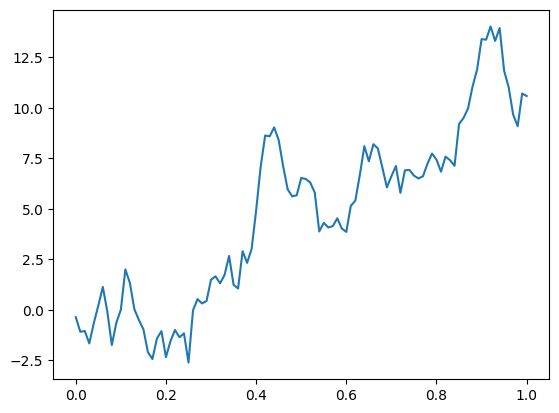

In [ ]:
plt.plot(x, y)  # stonks

Цвет графика можно менять

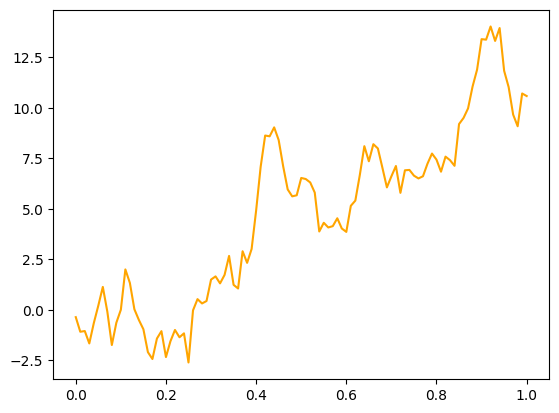

In [ ]:
plt.plot(x, y, color="orange")

Начертание тоже


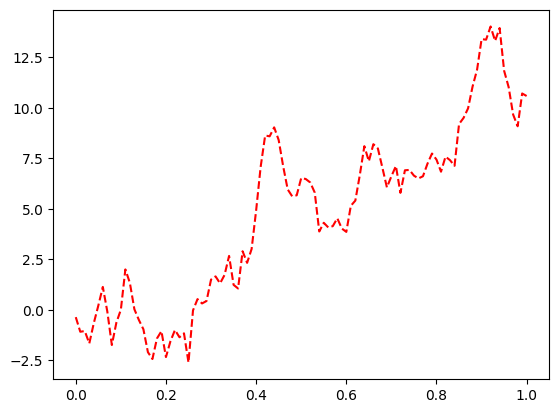

In [ ]:
plt.plot(x, y, 'r--')

Можно рисовать несколько линий на одном графике

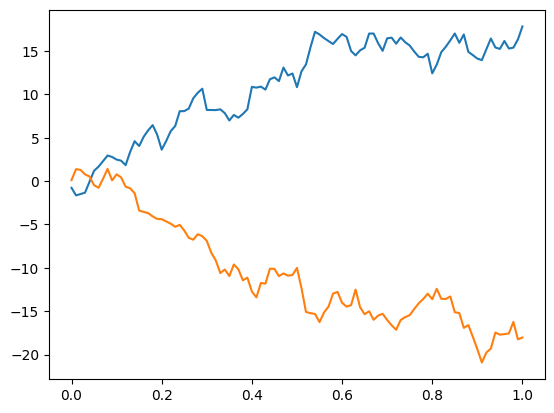

In [ ]:
x = np.linspace(0, 1, 101)
y1 = np.cumsum(np.random.normal(loc=0.1, size=101))
y2 = np.cumsum(np.random.normal(loc=-0.1, size=101))
plt.plot(x, y1)
plt.plot(x, y2)

Также в Matplotlib есть другие виды графиков - о них можно узнать в документации по библиотеке или в ноутбуке S1_extra

**Диаграмма рассеяния** (scatter plot)

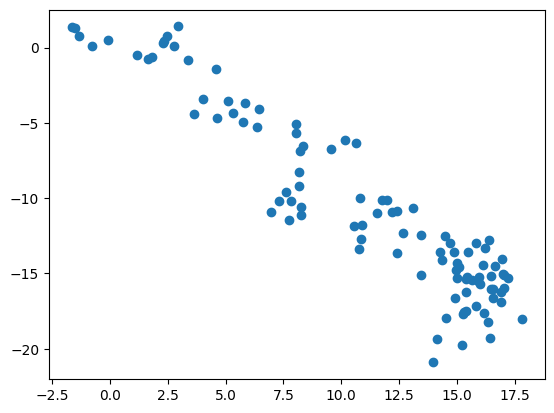

In [ ]:
plt.scatter(y1, y2)

**Гистограмма** (histogram)

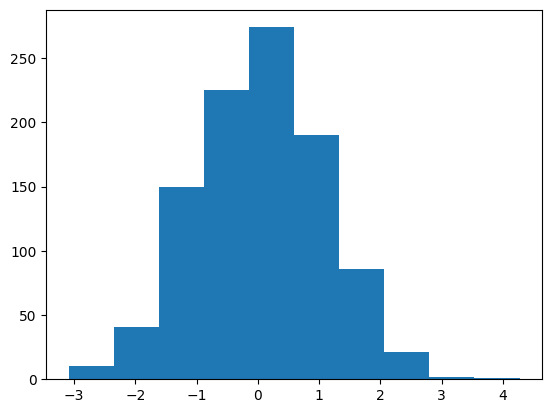

In [ ]:
rvs = np.random.normal(size=1000)
plt.hist(rvs)
plt.show()

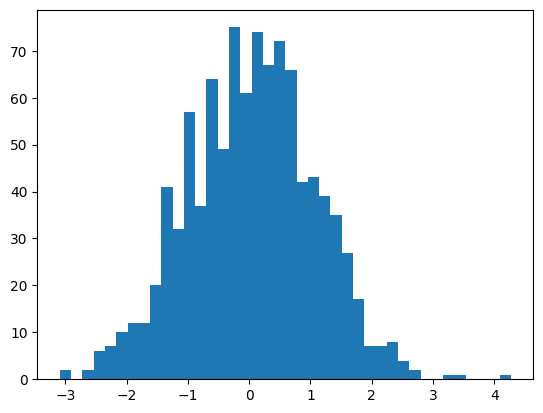

In [ ]:
plt.hist(rvs, bins=40)
plt.show()

# На этом всё!

Полную документацию NumPy смотрите на сайте: https://numpy.org/doc/

Полная документация MPL: https://matplotlib.org/stable/contents.html

Полная документация SciPy: https://docs.scipy.org/doc/scipy/index.html